<a href="https://colab.research.google.com/github/JoaoSGSiqueira/ProjetoIntegrador_06_2024/blob/main/PUCSP_AULA09_PYSPARK_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=9cfc8dcc53588a86c8821ba8ffab5fbceaea235711c46832b2cf3e30772ef98d
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


CRIANDO UM SPARK CONTEXT

In [53]:

import pyspark
from pyspark.sql import SparkSession


spark = SparkSession.builder.appName("HelloWorld").getOrCreate()
sc = spark.sparkContext



CRIA FUNÇÃO QUE TRANSFORMA O RESULTADO EM UM DATAFRAME

In [4]:
import pandas as pd
def toDF(result):
    lista=[]
    for linha in result:
        dict_aux = {}
        dict_aux.update({"palavra": linha[0], "qtde": linha[1]})
        lista.append(dict_aux)
    df = pd.DataFrame(lista)
    return df


EXEMPLO 1 DE MAP REDUCE

In [5]:
dados=["B","B","B","C","C","C","D","D","D D"]

input_file=sc.parallelize(dados,3)
counts = input_file.map(lambda word:(word, 1)) \
                     .reduceByKey(lambda a, b: a + b)

result=counts.collect()
print(result)
df=toDF(result)
print(df)

#sc.stop()

[('B', 3), ('C', 3), ('D', 2), ('D D', 1)]
  palavra  qtde
0       B     3
1       C     3
2       D     2
3     D D     1


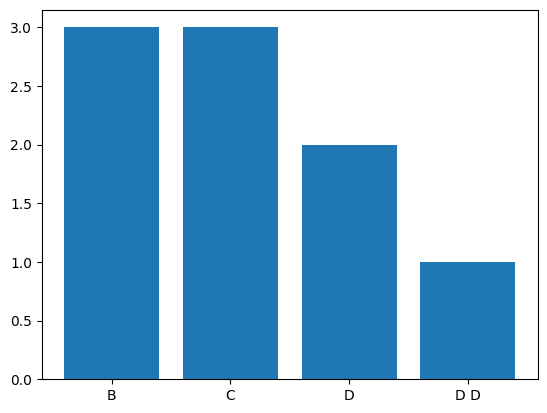

In [6]:
import matplotlib.pyplot as plt
plt.bar(df["palavra"],df["qtde"])
plt.show()

EXEMPLO 2 DE MAP REDUCE

In [7]:
dados=["B","B","B","C","C","C","D","D D"]
item=["B","D"]
input_file=sc.parallelize(dados,3)
counts = (input_file.map(lambda word:(word, 1) if (word in item) else (word,0))
                     .reduceByKey(lambda a, b: a + b))

result=counts.collect()
print(result)
df=toDF(result)
df.query("qtde>0")


[('B', 3), ('C', 0), ('D', 1), ('D D', 0)]


,palavra,qtde
0,B,3
2,D,1


ENTENDENDO CÁLCULO LAMBDA <BR>

De maneira geral uma função lambda em Python é escrita da forma

**lambda** argumentos: expressão


EXEMPLOS DE FUNÇÃO SIMPLES

In [8]:
def f3(x):
  return x+1

f1=lambda x:x+1
print(f1(10))


11


In [9]:
f2=lambda x,y:x*y
print(f2(5,10))

50


DIFERENÇA DE IMPLEMENTAÇÃO DE UMA FUNÇÃO SEM E COM CÁLCULO LAMBDA

In [10]:
def febre2(tmp):
  status=""
  if tmp<37:
    status="NORMAL"
  elif tmp<38:
    status="FEBRIL"
  else:
    status="FEBRE"
  return status

febre=lambda tmp:"NORMAL" if tmp<37 else "FEBRIL" if tmp<38 else "FEBRE"
print(febre(32))
print(febre(37.8))
print(febre(39))

NORMAL
FEBRIL
FEBRE


UTILIZANDO O CONCEITO DE MAP COM CÁLCULO LAMBDA<BR>
MAPEANDO UMA LISTA PARA O DOBRO DELA

In [11]:
lista=[1,2,3,4,5,6]
dobro=list(map(lambda x:x*2, lista))
print(dobro)

[2, 4, 6, 8, 10, 12]


MAPEANDO UMA LISTA PARA QUE TODOS OS VALORES SEJAM POSITIVOS (VALOR ABSOLUTO)

In [12]:
z=list(map(abs, [-1, -2, -3, 7,-10]))
print(z)


[1, 2, 3, 7, 10]


UTILIZANDO O CONCEITO DE FILTER COM CÁLCULO LAMBDA<BR>
FILTRANDO TODOS OS ELEMENTOS DE UMA LISTA MAIOR QUE 4

In [13]:
lista=[1,2,3,4,5,6]
maior=list(filter(lambda x:x>4, lista))
print(maior)

[5, 6]


UTILIZANDO O CONCEITO DE REDUCE COM CÁLCULO LAMBDA
COMPARA OS ELEMENTOS REDUZINDO APENAS AO MAIOR ELEMENTO

In [14]:
from functools import reduce
lista=[1, 2, 3, 40, 5, 67, 7, 8, 9, 10]
maior=reduce(lambda x, y: x if x>y else y, lista)
print(maior)

67


COMBINANDO MAP REDUCE

In [15]:
from functools import reduce
lista=[1, 2, 3, 4, 5]
soma=list(map(lambda x:x*2, lista))
print(soma)

soma2=(reduce(lambda y,x:y+x, soma))
print(soma2)


[2, 4, 6, 8, 10]
30


UTILIZANDO O REDUCE PARA CONTAR QTDE DE NÚMEROS PARES EM UMA LISTA

In [16]:
from functools import reduce
lista=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
par=reduce(lambda x,y: x+1 if y%2 ==0 else x+0, lista)
print(par)

5


VOLTANDO UTILIZAR SPARK

CALCULANDO QUADRADO SEM PYSPARK

In [17]:
lista=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
quadrado=list(map(lambda x: x**2,lista))
print(quadrado)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


CALCULANDO QUADRADO **COM PYSPARK**

In [18]:
lista=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
nums = sc.parallelize(lista,3)
result=nums.map(lambda x: x**2)
quadrado=result.collect()
print(quadrado)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


CONTANDO PALAVRAS UTLIZANDO MAP REDUCE<br>


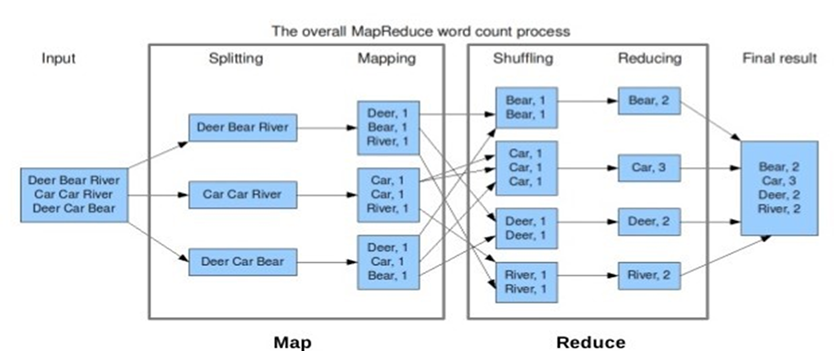

> Adicionar aspas



In [19]:
dados=["Deer","Bear","River","Car","Car","River","Deer","Car","Bear"]

input_file=sc.parallelize(dados,3)
tuplas=input_file.map(lambda word:(word, 1))
for i in tuplas.collect():
  print(i)
counts=tuplas.reduceByKey(lambda a, b: a + b)
result=counts.collect()
print(result)

('Deer', 1)
('Bear', 1)
('River', 1)
('Car', 1)
('Car', 1)
('River', 1)
('Deer', 1)
('Car', 1)
('Bear', 1)
[('Deer', 2), ('Car', 3), ('Bear', 2), ('River', 2)]


CONTANDO PALAVRAS ESPECÍFICAS

In [20]:
def func(w,item):
    ok=False
    for i in item:
        if i in w:
            ok=True
            break
    return ok

dados=["Deer","Bear","River","Car","Car","River","Deer","Car","Bear"]
item=["Deer","Car"]
input_file=sc.parallelize(dados,3)
counts = input_file.map(lambda word:(word, 1) if (func(word,item)) else (word,0)) \
                     .reduceByKey(lambda a, b: a + b)

result=counts.collect()
print(result)
df=toDF(result)
dfaux=df.query("qtde>0")
print(dfaux)

[('Deer', 2), ('Car', 3), ('Bear', 0), ('River', 0)]
  palavra  qtde
0    Deer     2
1     Car     3


CONTANDO PALAVRAS DE UMA PÁGINA URL

In [21]:
import requests

#response = requests.get("https://www.uol.com.br/esporte/futebol/ultimas-noticias/2023/10/25/palmeiras-x-sao-paulo-brasileirao-rodada-29.htm")
response = requests.get("https://www.uol.com.br/esporte/futebol/ultimas-noticias/2024/05/26/endrick-prepara-presente-para-funcionarios-do-palmeiras-veja-detalhes.htm")
print(response.text)

<!DOCTYPE html><html lang="pt-br"><head><meta charset="utf-8"><meta http-equiv="Content-Type" content="text/html; charset=utf-8"><title>Endrick prepara presente para funcionários do Palmeiras; veja detalhes</title><meta name="description" content="O atacante Endrick preparou um presente especial para entregar aos funcionários do Palmeiras antes de sua despedida no clube. Veja detalhes:"><meta name="format-detection" content="telephone=no"><meta name="twitter:card" content="summary_large_image"><meta name="twitter:description" content="O atacante Endrick preparou um presente especial para entregar aos funcionários do Palmeiras antes de sua despedida no clube.O que aconteceuEndrick irá entregar mais de 300 camisas com um patch especial com seu nome, uma foto e um autógrafo &mdash; o q"><meta name="twitter:image" content="https://conteudo.imguol.com.br/c/esporte/81/2024/05/26/camisa-que-endrick-dara-de-presente-para-todos-os-funcionarios-do-palmeiras-1716739783486_v2_615x300.jpg"><meta na

LIMPA O TEXTO REMOVENDO TODO HTML

In [22]:
from bs4 import BeautifulSoup as bs

soup = bs(response.text, 'html.parser')
texto = soup.get_text()
print(texto)


Endrick prepara presente para funcionários do Palmeiras; veja detalhesSeu timeSeu signoPolíticaJogos de HojeEntreAssine UOLLogo UOLHome UOLProdutosConteúdo ExclusivoUOL MailUOL PlayUFCChampions LeagueNBABate-papo UOLUOL Leia+UOL Segurança DigitalUOL Família ProtegidaUOL Assistência TécnicaUOL ResolveUOL WI-FIUOL SexoClube UOLUOL adsUOL HostUOL Meu NegócioUOL AfiliadosNotíciasColunasCotidianoEducaçãoGoverno LulaInternacionalPrevisão do tempoSaúdeUOL ConfereNewslettersÚltimas notíciasLoteriasMega SenaQuinaLotofácilLotomaniaOutras loteriasPodcastsPosse de BolaSexoterapiaSplash Vê TVUOL EntrevistaUOL PrimeUOL LíderesMídia e MarketingPolíticaCarrosTabela FipeLançamentos e MercadoAvaliação de CarrosComparativoLegislação, Multas e TrânsitoManutenção e SegurançaCarros curiososCarro dos famososVídeosWeb StoriesÚltimas notíciasNewslettersEconomiaCotaçõesInvestimentosEmpresas e NegóciosDinheiro e RendaConcursosGuia de ComprasGuia de EconomiaImposto de RendaLíderesMídia e MarketingColunasNewslette

In [23]:
x="JOÃO FOI PARA SÃO PAULO"
print(x.split())

['JOÃO', 'FOI', 'PARA', 'SÃO', 'PAULO']


In [24]:
input_file=sc.parallelize(texto,4)
counts = input_file.flatMap(lambda line: line.split()) \
                     .map(lambda word: (word, 1)) \
                     .reduceByKey(lambda a, b: a + b)

result=counts.collect()
#print(result)
df=toDF(result)
df


,palavra,qtde
0,r,404
1,i,503
2,c,195
3,p,150
4,s,552
...,...,...
82,/,27
83,(,2
84,:,4
85,Z,1


In [25]:
!pip install nltk

In [26]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('portuguese'))

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [27]:
termosExcluir=["dá","uolhome","em","do","se","de","para","um","dois",".","!","-", "que",",","'",",","\\n","\n", "e", "a", "o","uol","da","sempre"]
stop = set(stopwords.words('portuguese'))
stopAll = stop.union(termosExcluir)
print(stopAll)

input_file=sc.parallelize(texto.lower().split(),3) \
              .filter(lambda palavra: palavra.lower() not in stopAll)

counts = input_file.map(lambda word: (word, 1)) \
                   .reduceByKey(lambda a, b: a + b)
result=counts.collect()
#print(result)
df=toDF(result)
print(df)
dfaux=df.query("qtde>=5")
dfaux.sort_values(by="qtde",ascending=False)

{'estiverem', 'te', 'de', 'mais', 'houveríamos', 'tenha', 'tem', 'tivermos', 'houvera', 'um', '\\n', 'deles', 'num', 'mas', 'ser', 'tive', 'esse', 'nas', 'estejam', 'dá', 'será', 'estivesse', 'estes', 'houvéssemos', 'o', 'suas', 'estas', 'nossa', 'mesmo', 'estivermos', 'fosse', 'hei', 'dela', 'que', 'aquele', 'tivemos', 'sem', 'eles', 'aquilo', 'estiver', 'tivéramos', 'está', ',', 'as', 'teu', 'pelo', 'seus', 'a', 'dos', 'os', 'estejamos', 'estou', 'haja', 'fomos', 'na', 'teve', "'", 'esses', 'pela', 'quando', 'tu', 'estivéssemos', 'aqueles', 'aquela', 'tiveram', 'estão', 'fôramos', 'houverei', 'depois', '\n', 'tiverem', 'estar', 'tua', 'foram', 'teria', 'é', 'houveriam', 'à', 'fui', 'ele', 'estavam', 'estivera', 'delas', 'terei', 'vos', 'dele', 'essa', 'tém', 'sejam', 'hajam', 'das', 'minhas', 'por', 'tiver', 'uma', 'temos', 'eu', 'entre', 'fossem', 'houvermos', 'como', 'houveria', 'tínhamos', 'sempre', 'nos', '.', 'às', 'este', 'hão', 'ou', 'houver', 'vocês', 'meu', 'terão', 'meus', 

,palavra,qtde
207,palmeiras,8
140,endrick,5
309,presente,5
310,funcionários,5


In [28]:
termosExcluir=["de","para","um","dois",".","!","-", "que",",","'",",","\\n","\n", "e", "a", "o"]

stop = set(stopwords.words('portuguese'))
stopAll = stop.union(termosExcluir)
print(stopAll)
input_file=sc.parallelize(texto.upper().split(),3) \
              .filter(lambda palavra: palavra.lower() not in termosExcluir)

counts = input_file.map(lambda word: (word, 1)) \
                   .reduceByKey(lambda a, b: a + b)
result=counts.collect()
#print(result)
df=toDF(result)
dfaux=df.query("qtde>5")
dfaux.sort_values(by="qtde",ascending=False)

{'estiverem', 'te', 'de', 'mais', 'houveríamos', 'tenha', 'tem', 'tivermos', 'houvera', 'um', '\\n', 'deles', 'num', 'mas', 'ser', 'tive', 'esse', 'nas', 'estejam', 'será', 'estivesse', 'estes', 'houvéssemos', 'o', 'suas', 'estas', 'nossa', 'mesmo', 'estivermos', 'fosse', 'hei', 'dela', 'que', 'aquele', 'tivemos', 'sem', 'eles', 'aquilo', 'estiver', 'tivéramos', 'está', ',', 'as', 'teu', 'pelo', 'seus', 'a', 'dos', 'os', 'estejamos', 'estou', 'haja', 'fomos', 'na', 'teve', "'", 'esses', 'pela', 'quando', 'tu', 'estivéssemos', 'aqueles', 'aquela', 'tiveram', 'estão', 'fôramos', 'houverei', 'depois', '\n', 'tiverem', 'estar', 'tua', 'foram', 'teria', 'é', 'houveriam', 'à', 'fui', 'ele', 'estavam', 'estivera', 'delas', 'terei', 'vos', 'dele', 'essa', 'tém', 'sejam', 'hajam', 'das', 'minhas', 'por', 'tiver', 'uma', 'temos', 'eu', 'entre', 'fossem', 'houvermos', 'como', 'houveria', 'tínhamos', 'nos', '.', 'às', 'este', 'hão', 'ou', 'houver', 'vocês', 'meu', 'terão', 'meus', 'houve', 'seriam

,palavra,qtde
365,DO,19
26,DA,13
385,NO,10
222,SEU,8
436,PALMEIRAS,8
38,COM,7
268,NA,7
434,EM,7


In [29]:
myWords=['palmeiras','santos','corinthians','são','paulo','mundial','endrick','abel']
stopAll = myWords
print(stopAll)
input_file=sc.parallelize(texto.upper().split(),3) \
              .filter(lambda palavra: palavra.lower() in stopAll)

counts = input_file.map(lambda word: (word, 1)) \
                   .reduceByKey(lambda a, b: a + b)
result=counts.collect()
print(result)
df=toDF(result)
print(df)
dfaux=df.query("qtde>1")
dfaux.sort_values(by="qtde",ascending=False)

['palmeiras', 'santos', 'corinthians', 'são', 'paulo', 'mundial', 'endrick', 'abel']
[('PAULO', 1), ('SÃO', 2), ('ENDRICK', 5), ('PALMEIRAS', 8)]
     palavra  qtde
0      PAULO     1
1        SÃO     2
2    ENDRICK     5
3  PALMEIRAS     8


,palavra,qtde
3,PALMEIRAS,8
2,ENDRICK,5
1,SÃO,2


A FUNÇÃO ABAIXO PRETENDE CONTAR APENAS TERMOS ESPECÍFICOS COMO "SÃO PAULO" e "PONTE PRETA".
HÁ UM ERRO NESSA SOLUÇÃO, TENTE IDENTIFICAR O ERRO E ENCONTRAR UMA SOLUÇÃO!!!!

In [30]:
from bs4 import BeautifulSoup as bs

def func(w,itens):
    result=""
    for i in itens:
        if i in w:
            result=i
            break
    return result


soup = bs(response.text, 'html.parser')
parag = soup.find_all('p')
link=soup.find_all('a')

linhas=[]

for i in range(len(parag)):
    linhas.append(parag[i].text.upper())

for i in range(len(link)):
    linhas.append(link[i].text.upper())

print(linhas)


itens=["PALMEIRAS","SÃO PAULO","CORINTHIANS","SANTOS","BRAGANTINO","PONTE PRETA"]

input_file=sc.parallelize(linhas,3)

counts = input_file.flatMap(lambda line:line.split(",")) \
                   .map(lambda linha:(func(linha,itens),1) if func(linha,itens)!="" else (linha,0) )\
                   .reduceByKey(lambda a, b: a + b)

result=counts.collect()
print(result)
df=toDF(result)
dfaux=df.query("qtde>0")
dfaux

['O ATACANTE ENDRICK PREPAROU UM PRESENTE ESPECIAL PARA ENTREGAR AOS FUNCIONÁRIOS DO PALMEIRAS ANTES DE SUA DESPEDIDA NO CLUBE.', 'ENDRICK IRÁ ENTREGAR MAIS DE 300 CAMISAS COM UM PATCH ESPECIAL COM SEU NOME, UMA FOTO E UM AUTÓGRAFO — O QUE TRANSFORMA O ITEM EM ÚNICO.', 'FORAM MUITAS PESSOAS TORCENDO POR MIM E ME AJUDANDO NO CLUBE NESSES ANOS, E QUERIA DEIXAR ALGO ÚNICO, ESPECIAL PARA ELAS, QUE SÓ ELES TIVESSEM, E DAÍ SURGIU A IDEIA DO PATCH. FOI O JEITO QUE ENCONTREI DE MOSTRAR PARA TODOS QUE ELES, COMO MINHA FAMÍLIA, SÃO TAMBÉM CAMPEÕES PARA MIM. ENDRICK.', 'PVC', 'SAÍDA DE DUDU MARCA O FIM DE UMA ERA NO PALMEIRAS', 'MILLY LACOMBE', 'FALA DE LULA SOBRE TEXTO DO ABORTO É TARDIA E OFENSIVA', 'WÁLTER MAIEROVITCH', 'G7 TERMINA EM REPRESÁLIAS E PUXÕES DE ORELHA', 'JULIO GOMES', 'ESPANHA PASSEIA E ATROPELA CROÁCIA NA EURO', 'O PATCH É SIMILAR AOS QUE OS CLUBES USAM APÓS CONQUISTAS DE TÍTULOS IMPORTANTES. AS CAMISAS SERÃO ENTREGUES AO LONGO DESSA SEMANA, A ÚLTIMA DE ENDRICK NO PALMEIRAS.', '

,palavra,qtde
121,PONTE PRETA,4
230,PALMEIRAS,15


***COMO CONTAR UM CONJUNTO ESPECÍFICOS DE TERMOS EM UMA LISTA DE SITES PRÉ-DETERMINADOS***

In [31]:
listaSites=[]
listaSites.append("https://forum.adrenaline.com.br/threads/guia-de-escolha-e-indicacoes-de-monitores.450694/page-1264.htm")
listaSites.append("https://forum.adrenaline.com.br/threads/navi-proxima-geracao-de-gpus-da-amd.645334/page-994.htm")
listaSites.append("https://forum.adrenaline.com.br/threads/nvidia-geforce-rtx-4xxx.696550/page-1102.htm")
listaSites.append("https://forum.adrenaline.com.br/threads/undervolting-em-placas-de-video.700118/page-8.htm")
listaSites.append("https://forum.adrenaline.com.br/threads/nvidia-geforce-rtx-3xxx.675228/page-1258.htm")

In [71]:
import requests


from bs4 import BeautifulSoup as bs

def limpaHTML(pagina):
    soup = bs(pagina, 'html.parser')
    # Find all tags that contain text
    tags_with_text = soup.find_all(string=True)
    linhas = []
    for tag in tags_with_text:
        # Get the text from each tag and convert it to upper case
        if tag.parent.name not in ['style', 'script', 'head', 'title', 'meta', '[document]']:  # Ignore tags that don't contribute to visible text
            linhas.append(tag.strip().upper())
    return linhas

In [69]:
dados=[]
for page in listaSites:
  response = requests.get(page)
  linhas=limpaHTML(response.text)
  dados=dados+linhas

print(len(dados))
print(dados)

16524


# Old Version

In [73]:
import pyspark
from pyspark.sql import SparkSession


spark = SparkSession.builder.appName("HelloWorld").getOrCreate()
sc = spark.sparkContext

def func(w,itens):
    result=""
    for i in itens:
        if i in w:
            result=i
            break
    return result

itens=["PLACA",
    "VÍDEO",
    "VIDEO",
    "PLACA DE VÍDEO",
    "PLACA DE VIDEO",
    "GPU", ]


input_file=sc.parallelize(dados,3)

counts = input_file.flatMap(lambda line:line.split(",")) \
                   .map(lambda linha:(func(linha,itens),1) if func(linha,itens)!="" else (linha,0) )\
                   .reduceByKey(lambda a, b: a + b)

result=counts.collect()
print(result)D
df=toDF(result)
#df
dfaux=df.query("qtde>0")
dfaux.sort_values(by="qtde",ascending=False)

[('PORTAL', 0), ('NOVAS POSTAGENS DE PERFIL', 0), ('ÚLTIMAS ATIVIDADES', 0), ('PROCURAR POSTAGENS DE PERFIL', 0), ('REGISTRAR', 0), ('PESQUISAR', 0), ('EM TUDO', 0), ('PESQUISAR APENAS POR TÍTULO', 0), ('INSTALL THE APP', 0), ('VIDEO', 14), ('THIS FEATURE CURRENTLY REQUIRES ACCESSING THE SITE USING THE BUILT-IN SAFARI BROWSER.', 0), (' PLEASE ENABLE JAVASCRIPT IN YOUR BROWSER BEFORE PROCEEDING.', 0), ('YOU SHOULD UPGRADE OR USE AN', 0), ('GUIA DE ESCOLHA E INDICAÇÕES DE MONITORES', 0), ('DATA DE INÍCIO', 0), ('IR', 0), ('1263', 0), ('1264', 0), ('1265', 0), ('PRÓXIMA', 0), ('FIRST', 0), ('T', 0), ('REGISTRADO', 0), ('28/05/2024', 0), ('576', 0), ('CLIQUE PARA EXPANDIR...', 0), ('PORÉM NÃO TENHO PC A BASTANTE TEMPO', 0), (' JOGO NO PC DO MEU IRMÃO NAS RARAS VEZES QUE VOU NA CASA DELE. DEVIDO A ESSE GRANDE TEMPO SEM PC TEM DEZENAS JOGOS CAMPANHA QUE PRETENDO JOGAR/ZERAR. COMO NÃO JOGO COM TANTA FREQUÊNCIA', 0), (' IMAGINO QUE PELO MENOS NO PRIMEIRO ANO DO PC', 0), ('', 0), ('QUAL MONITOR

,palavra,qtde
1282,GPU,102
1245,PLACA,101
752,VÍDEO,17
9,VIDEO,14


New Version that can have more than 1 element count at a time

In [70]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Initialize SparkSession
spark = SparkSession.builder.appName("TermCounter").master("local[*]").getOrCreate()

# List with potential empty strings
# dados

# Ensure there are no None values in the data and remove empty strings
dados = [line for line in dados if line and line.strip()]
if not dados:
    raise ValueError("The input data is empty after filtering None and empty values.")

# Define the function to check for the presence of terms in a given string
def func(w, itens):
    matches = []
    for i in itens:
        if i in w:
            matches.append(i)
    return matches

# Define the list of terms to search for
itens = ["PLACA", "VÍDEO", "VIDEO", "PLACA DE VÍDEO", "PLACA DE VIDEO", "GPU"]

try:
    # Create an RDD from the input data, using more partitions
    input_rdd = spark.sparkContext.parallelize(dados, 10)

    # Process the RDD to count the occurrences of each term
    counts = (input_rdd.flatMap(lambda line: line.split(","))
                       .flatMap(lambda linha: func(linha, itens))
                       .map(lambda match: (match, 1))
                       .reduceByKey(lambda a, b: a + b))

    # Collect the results
    result = counts.collect()

    # Debugging: Print the intermediate result
    print("Intermediate result:", result)

    # Convert the result to a DataFrame
    df = spark.createDataFrame(result, ["term", "qtde"])

    # Filter and sort the DataFrame
    dfaux = df.filter(col("qtde") > 0).sort(col("qtde").desc())

    # Show the DataFrame
    dfaux.show()
except Exception as e:
    print("An error occurred:", e)
finally:
    # Stop the SparkSession
    spark.stop()


Intermediate result: [('VIDEO', 17), ('GPU', 109), ('PLACA DE VIDEO', 3), ('VÍDEO', 35), ('PLACA DE VÍDEO', 7), ('PLACA', 101)]
+--------------+----+
|          term|qtde|
+--------------+----+
|           GPU| 109|
|         PLACA| 101|
|         VÍDEO|  35|
|         VIDEO|  17|
|PLACA DE VÍDEO|   7|
|PLACA DE VIDEO|   3|
+--------------+----+

